# Part II - Data Visualization of Loan Delinquency in Prosper Loan Porfolios
## By Yaji Timothy T.

## Investigation Overview
Prudent credit risk management to minimize loan delinquents are the challenges that financial institution faces in order to survive in both good and bad economies. High loan delinquencies could lead to a liquidity problem that causes financial institution to fall and jeopardizing the country’s economy. The principles of good lending state that a loan should not be granted to a borrower until the source of repayment is reasonably certain.

It is against this backdrop that we investigate the Prosper Loan porfolios to understand the nature of its loan delinquency by asking the following questions:

> * What is the percentage of Delinquent loans in Prosper porfolio? 
> * Which category of listing have the most delinquent loans and for what purpose are the loans collected? Are the borrowers house owners?
> * What is the Credit Score of Borrowers with the highest frequency of Loan Delinquency? 
>* What is the proportion borrowers with delinquent loans that are home owners?
> * Which year has the lowers number of delinquent loans? 
> * Does any Relationship exit between BorrowerAPR,MonthlyLoanPayment, LoanOriginalAmount,   DebtToIncomeRatio for delinquent loans?


**Summary of key insigts**

>* 16.80% of the loans are delinquent in the prosper Loan porfolio
>* The higest total amount of loans delinquent was from 36 months term loans which has thier purpose specified as Not available.
>* The highest number of delinquent loans are from people with good credit score rating.
>* About 54.5 percent of borrowers with delinquent loans are home owners
>* Loan delinquency fluctuates over the years with the lowest delinquent loan payment amount occuring in the year 2009.
>* Theere is a negative relationship between  between Borrower APR with Monthly loan payment and loan original amount for loans that are delinquent. Also a positive relationship exist between loan original maount with monthly loan payment and debt to income ratio for loans that are delinquent in propser loan porfolio.


## Dataset Overview

The dataset used is [Loan Data from Prosper](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1581581520570000): This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. See this [data dictionary](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1554486256024000) to understand the dataset's variables.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
Df_ProperLoan_Delinquent = pd.read_csv("ProperLoan_Delinquent.csv")

 ## Visualization 1:
 **What is the proportion of delinquent loan in prosper porfolio?**
 ## Insight 1:
>* From the the exploratory analysis of Prosper loan porfolios, we discovered that 16.80% of the loans are delinquent.
 

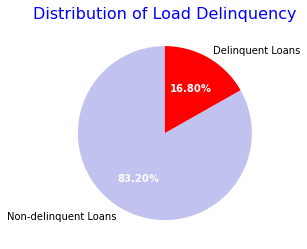

In [3]:
#Plot a pie chart
patches, text,ax=plt.pie(Df_ProperLoan_Delinquent.DelinquentStatus.value_counts(), labels=["Non-delinquent Loans", "Delinquent Loans"],
           colors=['#c2c2f0','red'],autopct='%.2f%%', startangle=90)
selection="Delinquent Loans"
for patch, text, ax in zip(patches, text, ax):
    ax.set_color('white')
    ax.set_weight('bold')
if text.get_text() != selection:
        patch.set_alpha(0.3)
        
plt.title('Distribution of Load Delinquency', fontsize=16,color='blue');

## Visualization 2:
**What term of the loans has the higest total amount of monthly loan payment deliquent  and for what purpose was the loans taken**

## Insight:
> The higest total amount of loans delinquent was from 36 months term loans which has thier purpose specified as Not available. followed by loans taken for debts consolidation.

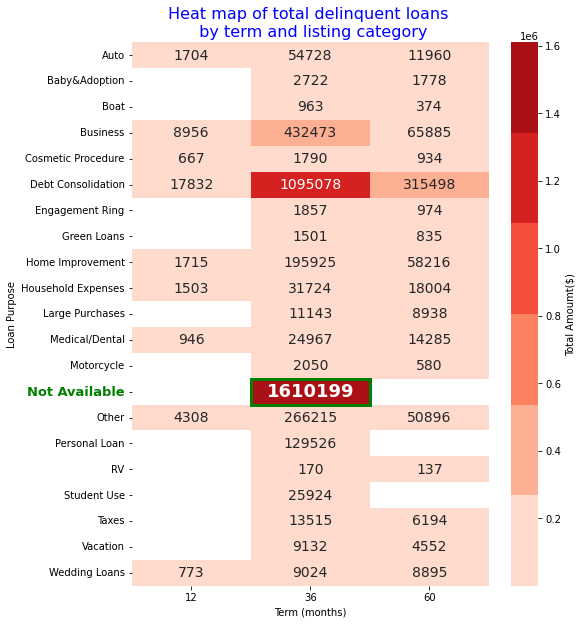

In [4]:
# Filter data with variables of interest
select_var=['Term','MonthlyLoanPayment','ListingCategory']
delinquent=Df_ProperLoan_Delinquent[Df_ProperLoan_Delinquent.DelinquentStatus==1]
df_loans=delinquent[select_var]
#Rearrange data by grouping the sum of monthly loan payment by Term and listing category 
ct=df_loans.groupby(['Term','ListingCategory'], as_index=False)['MonthlyLoanPayment'].sum()                              

# Use DataFrame.pivot() to rearrange the data, to have Listing category in  on rows
ct_sums = ct.pivot( index= 'ListingCategory',columns = 'Term', values = 'MonthlyLoanPayment')

#plot a heat map for the data
# define figure size
plt.figure(figsize=[8,10])
#plot heat map
color_gred=sb.color_palette("Reds")
ax=sb.heatmap(ct_sums,cmap =color_gred ,annot = True,fmt = '.0f',cbar_kws={'label': 'Total Amoumt($)', 'orientation': 'vertical'}  )
#add label of labels
ax.set_title('Heat map of total delinquent loans \n by term and listing category',fontsize=16, color='blue')
ax.set_xlabel('Term (months)')
ax.set_ylabel('Loan Purpose')
# Highlight the higest value in the heat map 
'''https://stackoverflow.com/questions/62696868/highlighting-maximum-value-in-a-column-on-a-seaborn-heatmap'''
from matplotlib.patches import Rectangle
ax.add_patch(Rectangle((1,13),1,1, fill=False, edgecolor='green', lw=3))

for label in ax.get_yticklabels():
    if label.get_text() == "Not Available":
        label.set_size(13)
        label.set_weight("bold")
        label.set_color("green")
        # set the properties of the heatmap annot
for text in ax.texts:
    text.set_size(14)
    if text.get_text() == '1610199':
        text.set_size(18)
        text.set_weight('bold');
        
     
      

## Visualization 3: 
**What is the Credit Score of Borrowers with the highest frequency of Loan Delinquency?**

## Insight 3:
>From the exploratory analysis we discovered that the highest number of delinquent loans are from people with good credit score rating.


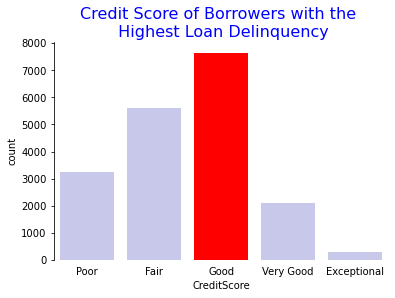

In [5]:
'''Convert CreditScore to ordinal category type to make the 
visualization more logical'''
#Define a function for countplot
Df_ProperLoan_Delinquent["CreditScore"]=Df_ProperLoan_Delinquent["CreditScore"].astype(pd.api.types.CategoricalDtype(categories=['Poor','Fair', 'Good', 'Very Good', 'Exceptional'], ordered=True))
ax = sb.countplot(data=Df_ProperLoan_Delinquent[Df_ProperLoan_Delinquent.DelinquentStatus==1], x='CreditScore', color='#c2c2f0')
plt.title('Credit Score of Borrowers with the \n Highest Loan Delinquency', fontsize=16, color='blue')
sb.despine(left=False, bottom=True)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
total = float(len(Df_ProperLoan_Delinquent))

#get the higest bar
patch_h=[patch.get_height() for patch in ax.patches]
#get the highest bar
idx_tal=np.argmax(patch_h)
#Add collor to the bar
ax.patches[idx_tal].set_facecolor('red')
   

## Visualization 4:
**What is the proportion borrowers with delinquent loans that are home owners?**

## Insight 4:
> About 54.5 percent of borrowers with delinquent loans are home owners while 45.5% of borrows are not home owners

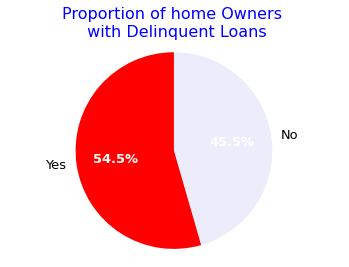

In [6]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:


explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(Df_ProperLoan_Delinquent[Df_ProperLoan_Delinquent.DelinquentStatus==1].IsBorrowerHomeowner.value_counts(),
                                    explode=explode, labels=["Yes", "No"], autopct='%1.1f%%', 
                                    startangle=90,colors=['red','#c2c2f0'], textprops={'fontsize': 13})
plt.title('Proportion of home Owners \n with Delinquent Loans', fontsize=16,color='blue');
ax1.axis('equal')  #Equal aspect ratio ensures that pie is drawn as a circle.'''
'''Make the segment of interest in the pie chart bold'''
selection = 'Yes'
for patch, text, autotext in zip(patches, texts, autotexts):
    autotext.set_color('white')
    autotext.set_weight('bold')
    if text.get_text() != selection:
        patch.set_alpha(0.3)
        
plt.show()

## Visualization 5:
**Which year has the lowest number of delinquent loans**
## Insight 5:
>* Loan delinquency fluctuates over the years with the lowest delinquent loan payment amount occuring in the year 2009.

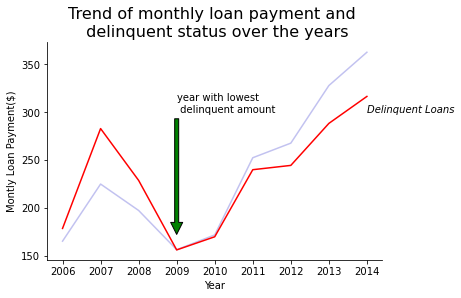

In [7]:
# sample 5000 point from the data set
df_delinquent=Df_ProperLoan_Delinquent.sample(5000)
#define hue colors
palettes = ['#c2c2f0','red']
# plots the pointplot for year vs BorrowerRate
ax=sb.lineplot(data=Df_ProperLoan_Delinquent, x='Year', y='MonthlyLoanPayment',ci=None,hue='DelinquentStatus',legend=None, palette=palettes )
plt.title('Trend of monthly loan payment and \n delinquent status over the years', fontsize=16)
plt.ylabel('Montly Loan Payment($)')
sb.despine(left=False, bottom=False)
ax.text(2014, 300, 'Delinquent Loans', style='italic') #legend for the line of interest
# Adding annotation on the plot.
ax.annotate('year with lowest \n delinquent amount', xy=(2009, 170), xytext=(2009, 300), fontsize=10,
            arrowprops=dict(facecolor='green', shrink=0.02));

## Visualization 6:
**Does any Relationship exit between BorrowerAPR,MonthlyLoanPayment, LoanOriginalAmount, DebtToIncomeRatio for delinquent loans?**
## Insignts 6:
The correlation coefficient of borrower APR and loan original amount is -0.323, the scatter plot also shows that these two variables are negatively correlated, which agrees with our hypothesis, that is the more the loan amount, the lower the APR. The loan original amount is positively correlated with the stated monthly income, it makes sense since borrowers with more monthly income could loan more money.

Correlation Matrix


,MonthlyLoanPayment,LoanOriginalAmount,DebtToIncomeRatio,BorrowerAPR
MonthlyLoanPayment,1.000000,0.964333,0.153576,-0.242359
LoanOriginalAmount,0.964333,1.000000,0.132033,-0.335112
DebtToIncomeRatio,0.153576,0.132033,1.000000,-0.000891
BorrowerAPR,-0.242359,-0.335112,-0.000891,1.000000


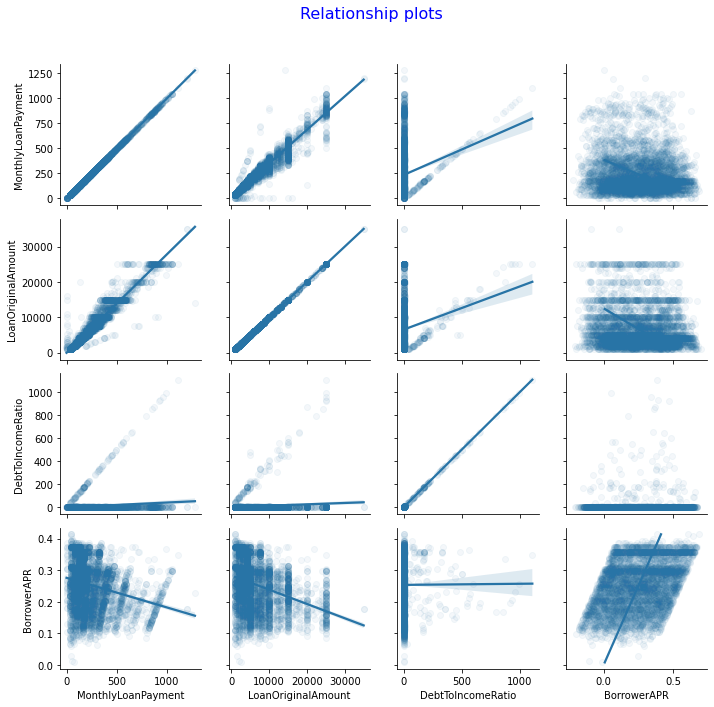

In [8]:
#filter data to have only delinquent loans
num_var=['MonthlyLoanPayment', 'LoanOriginalAmount', 'DebtToIncomeRatio','BorrowerAPR']
Df_Loan_Delinquent=Df_ProperLoan_Delinquent[Df_ProperLoan_Delinquent.DelinquentStatus==1][num_var]

# plot matrix: sample 5000 loans so that plots are clearer and render faster
loan_subsample = Df_Loan_Delinquent.sample(5000)
g = sb.PairGrid(data = loan_subsample, vars = Df_Loan_Delinquent.columns)
g.map(sb.regplot, x_jitter=0.3, scatter_kws={'alpha':1/20}, color='#2874A6')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Relationship plots', fontsize=16, color ='blue')

#print the correction table
print('Correlation Matrix')
Df_Loan_Delinquent.corr()

